Import Libraries

In [1]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
from requests_html import HTMLSession

In this step, the necessary Python libraries are imported. These include pandas for data manipulation, urllib for working with URLs, numpy for numerical operations, and requests_html for web scraping.

Define the get_and_parse Function

In [2]:
def get_and_parse(url):
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  for element in soup(['script', 'style', 'comment']):
      element.extract()
  text = soup.get_text(separator=' ')
  return text

This function takes a URL as input, sends a request to the website, and extracts the visible text content from the HTML using BeautifulSoup. Unwanted elements like scripts and styles are removed.

Define the parse_elements Function

In [3]:
def parse_elements(url, element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

This function uses the requests_html library to get the HTML content of a webpage and extracts specific HTML elements based on the provided tag (element).

Define the sentiment_detection Function

In [4]:
def sentiment_detection(sentence):
    positive_words = ('powerful', 'changing', 'potential', 'efficient', 'good', 'well', 'advances', 'engaging', 'ethical', 'potential', 'good')
    negative_words = ('ambiguous', 'limitations', 'concerns', 'fool', 'undermined', 'fail', 'biased', 'discrimination', 'spread', 'polarization')

    positive = any(sentence.count(i) > 0 for i in positive_words)
    negative = any(sentence.count(i) > 0 for i in negative_words)

    if positive == negative == False:
        return "neutral"
    elif positive != negative:
        return "positive" if positive else "negative"
    else:
        return "mixed"

This function analyzes the sentiment of a given sentence based on predefined positive and negative words, returning either "positive," "negative," or "neutral."

Define the topic_detection Function

In [5]:
def topic_detection(sentence):
    MachineLearning_words = ('machine learning', 'learning', 'chatbots', 'AI', 'predictions', 'algorithms', 'algorithm', 'predict', 'Reinforcement', 'unsupervised',
                             'Supervised', 'Neural', 'Deep learning', 'Fraud detection', 'accuracy', 'visual', 'Translate', 'imaging', 'diagnostics', 
                             'make decisions', 'science', 'program' )
    Data_Technology_words = ('data', 'ethical', 'machines', 'growing', 'technical', 'programmed', 'potential', 'Digital', 'engineering', 'discovery', 'ideas')

    ML = any(sentence.count(i) > 0 for i in MachineLearning_words)
    DT = any(sentence.count(i) > 0 for i in Data_Technology_words)
    topics = []
    if ML == True:
        topics.append("ML")
    if DT == True:
        topics.append("DT")
    return topics

This function detects topics in a given sentence based on predefined sets of words related to machine learning and data technology.

Set the Target URL and Extract Paragraphs and Links

In [6]:
url = 'https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

Target URL for analysis, in this case, the MIT Sloan webpage about machine learning and the parse_elements function to extract paragraphs and links from the specified URL.

Print Paragraph Type

In [7]:
type(paragraphs[0])

requests_html.Element

This line prints the type of the first paragraph, providing information about the data structure.

Create a Dictionary for Paragraphs and Topics

In [9]:
#print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)p_dictionary = {}
p_dictionary = {}
p_list = []
topic_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 100:
        p_list.append(paragraphs[p].text)
        topic_list.append(topic_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list

This block of code creates a dictionary containing lists of paragraphs and their corresponding topics, filtering out short paragraphs.

Display Topics

In [11]:
p_dictionary['Topics']

[['ML'],
 ['ML', 'DT'],
 ['ML'],
 ['DT'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['DT'],
 ['ML', 'DT'],
 ['ML'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML'],
 ['ML'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML', 'DT'],
 ['ML'],
 ['DT'],
 ['ML', 'DT'],
 ['ML'],
 ['DT'],
 ['ML', 'DT'],
 ['ML'],
 ['ML'],
 ['ML'],
 ['ML'],
 ['ML', 'DT'],
 ['ML'],
 ['ML'],
 ['ML', 'DT'],
 ['ML'],
 ['ML'],
 ['ML'],
 ['ML'],
 ['ML'],
 ['DT'],
 ['ML', 'DT'],
 ['ML'],
 ['ML', 'DT'],
 ['ML'],
 ['ML', 'DT'],
 ['ML'],
 ['ML'],
 ['ML'],
 ['ML'],
 ['ML', 'DT'],
 ['DT']]

This line prints out the list of topics detected for each paragraph.

Display Paragraphs

In [12]:
p_dictionary['Paragraphs']

['Through intellectual rigor and experiential learning, this full-time, two-year MBA program develops leaders who make a difference in the world.',
 'A 12-month program focused on applying the tools of modern data science, optimization and machine learning to solve real-world business problems.',
 'Combine an international MBA with a deep dive into management science. A special opportunity for partner and affiliate schools only.',
 'Bring a business perspective to your technical and quantitative expertise with a bachelor’s degree in management, business analytics, or finance.',
 'A joint program for mid-career professionals that integrates engineering and systems thinking. Earn your master’s degree in engineering and management.',
 'An interdisciplinary program that combines engineering, management, and design, leading to a master’s degree in engineering and management.',
 'A full-time MBA program for mid-career leaders eager to dedicate one year of discovery for a lifetime of impact.'

This line prints out the list of paragraphs that were analyzed.

Create DataFrame with Paragraphs and Topics

In [13]:
medium_df = pd.DataFrame(p_dictionary)
medium_df.head()

,Paragraphs,Topics
0,Through intellectual rigor and experiential le...,[ML]
1,A 12-month program focused on applying the too...,"[ML, DT]"
2,Combine an international MBA with a deep dive ...,[ML]
3,Bring a business perspective to your technical...,[DT]
4,A joint program for mid-career professionals t...,"[ML, DT]"


This code creates a Pandas DataFrame from the dictionary, displaying the first few rows of the DataFrame.

Add Character Count Column

In [15]:
medium_df['Character Count'] = medium_df['Paragraphs'].apply(lambda x: len(x))
medium_df.head()

,Paragraphs,Topics,Character Count
0,Through intellectual rigor and experiential le...,[ML],143
1,A 12-month program focused on applying the too...,"[ML, DT]",145
2,Combine an international MBA with a deep dive ...,[ML],132
3,Bring a business perspective to your technical...,[DT],145
4,A joint program for mid-career professionals t...,"[ML, DT]",151


This block of code adds a column to the DataFrame representing the character count of each paragraph and displays the first four rows.

Add Topic Count Column

In [16]:
medium_df['Topic Count'] = medium_df['Topics'].apply(len)
medium_df.head()

,Paragraphs,Topics,Character Count,Topic Count
0,Through intellectual rigor and experiential le...,[ML],143,1
1,A 12-month program focused on applying the too...,"[ML, DT]",145,2
2,Combine an international MBA with a deep dive ...,[ML],132,1
3,Bring a business perspective to your technical...,[DT],145,1
4,A joint program for mid-career professionals t...,"[ML, DT]",151,2


This block of code adds a column to the data frame representing the count of topics for each paragraph and displays the updated data frame.

Add Sentiment Analysis Column

In [17]:
medium_df['Sentiment'] = medium_df['Paragraphs'].apply(sentiment_detection)
medium_df.head()

,Paragraphs,Topics,Character Count,Topic Count,Sentiment
0,Through intellectual rigor and experiential le...,[ML],143,1,neutral
1,A 12-month program focused on applying the too...,"[ML, DT]",145,2,neutral
2,Combine an international MBA with a deep dive ...,[ML],132,1,neutral
3,Bring a business perspective to your technical...,[DT],145,1,neutral
4,A joint program for mid-career professionals t...,"[ML, DT]",151,2,neutral


This block of code adds a column to the data frame representing the sentiment analysis of each paragraph and displays the updated data frame.

Visualize Sentiment Distribution

Sentiment
neutral     42
positive    12
negative     5
mixed        2
Name: count, dtype: int64
[42, 12, 5, 2]
['neutral', 'positive', 'negative', 'mixed']


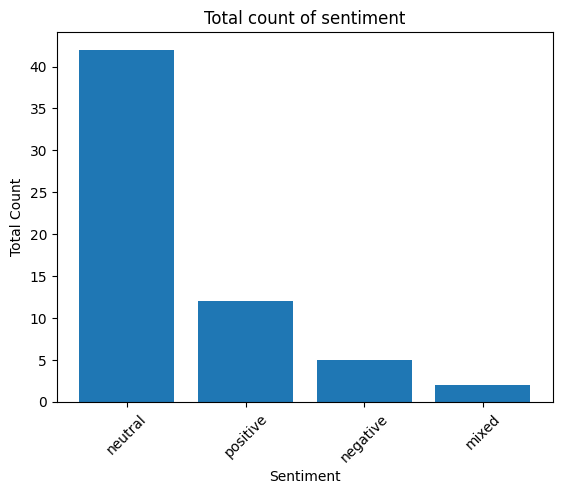

In [18]:
category_amount = medium_df['Sentiment'].value_counts()
print(category_amount)
print(list(category_amount))
print(list(category_amount.keys()))

import matplotlib.pyplot as plt
plt.bar(list(category_amount.keys()), list(category_amount))
plt.xlabel('Sentiment')
plt.ylabel('Total Count')
plt.title('Total count of sentiment')
plt.xticks(rotation=45)
plt.show()

This step visualizes the distribution of sentiment categories using a bar chart and prints out the total count of each sentiment category. The chart is customized with labels and rotated x-axis ticks for better readability.

Installing seaborn for better viewing

In [20]:
pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 445.2 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.6 kB 563.7 kB/s eta 0:00:01
   ----------------------------- ---------- 215.0/294.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Sentiment Distribution Visualization

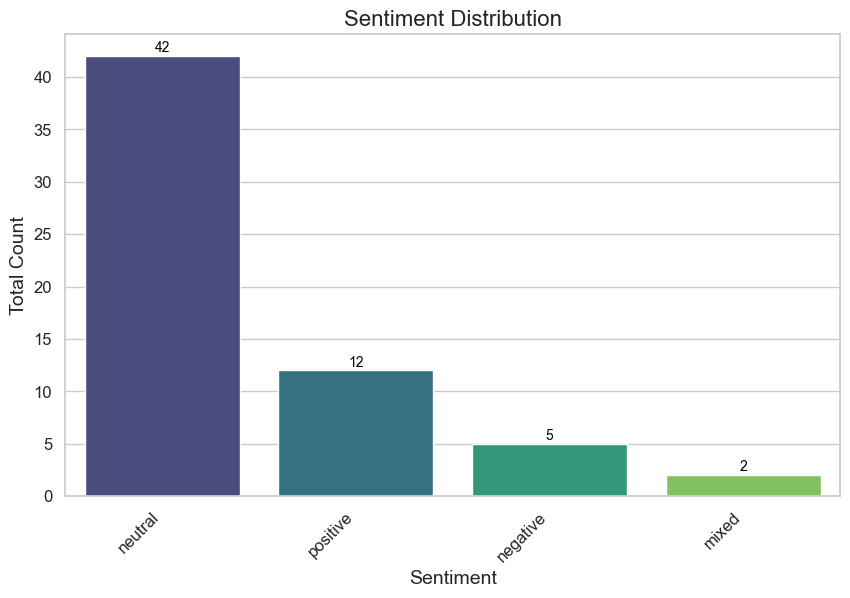

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Get sentiment counts
category_amount = medium_df['Sentiment'].value_counts()

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x=category_amount.index, y=category_amount.values, hue=category_amount.index, palette="viridis", legend=False)

# Customize the plot
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.title('Sentiment Distribution', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the count above each bar
for index, value in enumerate(category_amount):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()

This script combines Seaborn and Matplotlib to create an informative and visually appealing plot representing the distribution of sentiment categories in the provided DataFrame (medium_df). It's designed for easy customization and interpretation of sentiment data.

At the end of its adventure, the computer script succeeded! The colorful picture it made helped us understand how the MIT Sloan webpage felt. It was like the script took us on a journey, revealing the story hidden in the words.

And then, the script finished its work, leaving behind a tale of exploring and finding cool things on the internet. It showed us the magic of computers and how they can help us learn interesting stuff. The end